<a href="https://colab.research.google.com/github/samuelbahia/Report/blob/master/IBMEC_PENSA_COMP_2024_2_Samuel_Bahia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AVALIAÇÃO:**

A Delegada responsável pelos registros de ocorrências relacionados a apreensão de drogas, te pediu a média do total por Batalhões de Polícia Militar (aisp), para que possa auxiliá-la em suas estratégias.

Apresente o máximo de subsídios (tudo o que foi visto) para auxiliá-la em suas tomadas de decisões, inclusive se a média pode ser utilizada como uma medida confiável para resumir a distribuição dos dados.


Colunas presentes no arquivo CSV:
Index(['cisp', 'mes', 'ano', 'mes_ano', 'aisp', 'risp', 'munic', 'mcirc',
       'regiao', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameac

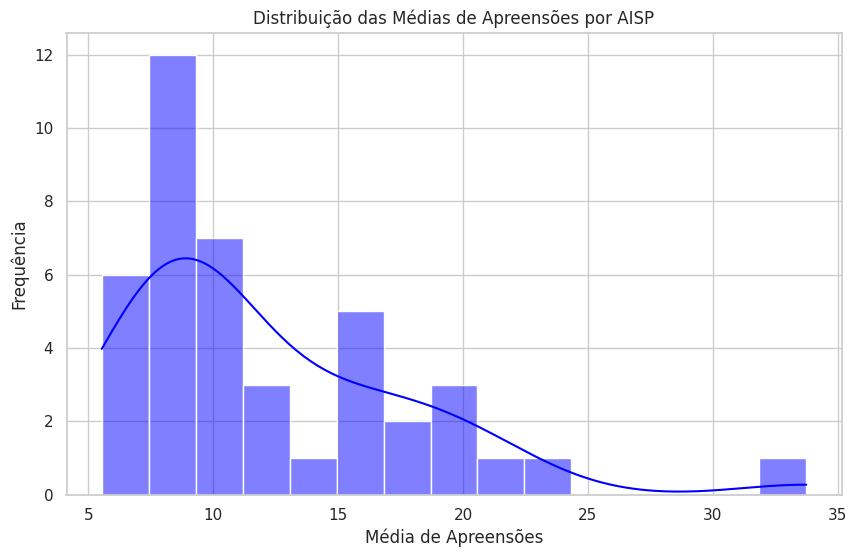

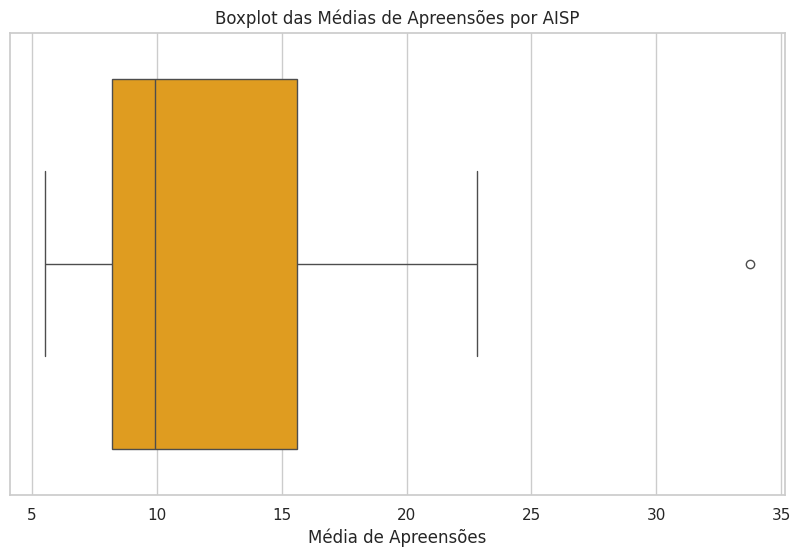

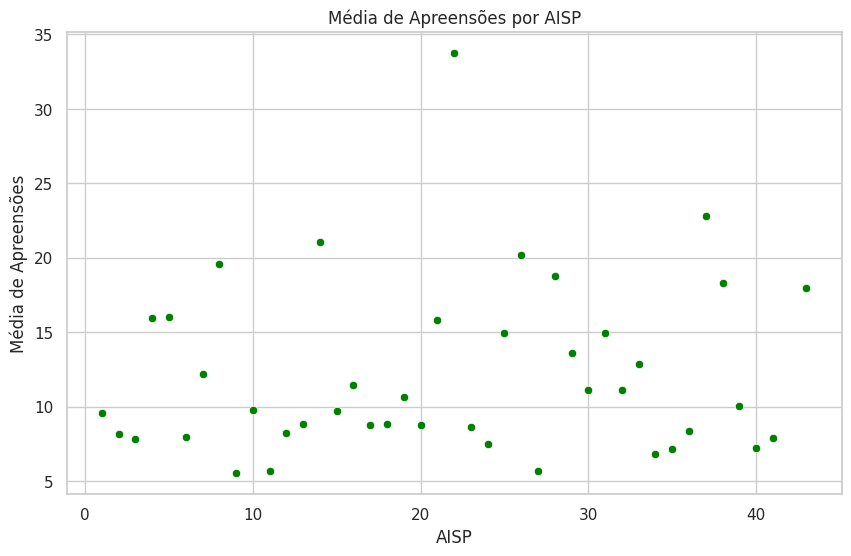

A média das apreensões de drogas por AISP pode não ser confiável devido à alta variabilidade ou assimetria na distribuição. Considere usar a mediana como uma medida alternativa.

Outliers identificados:
    AISP  Média_Apreensões
21    22         33.740458


In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

# Configurando visualizações do Seaborn
sns.set(style="whitegrid")

# URL do arquivo CSV
url = "https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv"

# Lendo o arquivo CSV diretamente da URL
data = pd.read_csv(url, sep=';', encoding='latin1')

# Exibindo as colunas disponíveis no CSV
print("Colunas presentes no arquivo CSV:")
print(data.columns)

# Verificando dados para confirmar a coluna de interesse
print(data.head())

# A coluna identificada para apreensão de drogas (exemplo)
coluna_drogas = "apreensao_drogas"  # Substituir pelo nome correto da coluna identificado no CSV

# Filtrando os dados necessários
data_filtrada = data[['aisp', coluna_drogas]].dropna()

# Convertendo a coluna de apreensões para formato numérico (se necessário)
data_filtrada[coluna_drogas] = pd.to_numeric(data_filtrada[coluna_drogas], errors='coerce')

# Agrupando os dados por AISP e calculando a média
media_por_aisp = data_filtrada.groupby('aisp')[coluna_drogas].mean().reset_index()

# Renomeando as colunas para facilitar a leitura
media_por_aisp.columns = ['AISP', 'Média_Apreensões']

# Exibindo as médias por AISP
print(media_por_aisp)

# Estatísticas gerais
media = media_por_aisp['Média_Apreensões'].mean()
mediana = media_por_aisp['Média_Apreensões'].median()
desvio_padrao = media_por_aisp['Média_Apreensões'].std()
coeficiente_variacao = desvio_padrao / media if media != 0 else float('inf')
iqr_value = iqr(media_por_aisp['Média_Apreensões'])

# Identificando outliers com base no IQR
q1 = media_por_aisp['Média_Apreensões'].quantile(0.25)
q3 = media_por_aisp['Média_Apreensões'].quantile(0.75)
limite_inferior = q1 - 1.5 * iqr_value
limite_superior = q3 + 1.5 * iqr_value
outliers = media_por_aisp[(media_por_aisp['Média_Apreensões'] < limite_inferior) |
                          (media_por_aisp['Média_Apreensões'] > limite_superior)]

# Avaliando confiabilidade da média
is_skewed = abs(media - mediana) > (0.1 * media)
is_mean_reliable = not is_skewed and coeficiente_variacao < 0.5

# Resumo das análises
print(f"Média das apreensões por AISP: {media:.2f}")
print(f"Mediana das apreensões por AISP: {mediana:.2f}")
print(f"Desvio padrão: {desvio_padrao:.2f}")
print(f"Coeficiente de variação: {coeficiente_variacao:.2f}")
print(f"IQR: {iqr_value:.2f}")
print(f"Outliers identificados: {len(outliers)}")
print(f"A média é confiável? {'Sim' if is_mean_reliable else 'Não'}")

# Histograma das médias por AISP
plt.figure(figsize=(10, 6))
sns.histplot(media_por_aisp['Média_Apreensões'], bins=15, kde=True, color='blue')
plt.title("Distribuição das Médias de Apreensões por AISP")
plt.xlabel("Média de Apreensões")
plt.ylabel("Frequência")
plt.show()

# Boxplot para identificar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=media_por_aisp['Média_Apreensões'], color='orange')
plt.title("Boxplot das Médias de Apreensões por AISP")
plt.xlabel("Média de Apreensões")
plt.show()

# Scatterplot para destacar os outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=media_por_aisp, x='AISP', y='Média_Apreensões', color='green')
plt.title("Média de Apreensões por AISP")
plt.xlabel("AISP")
plt.ylabel("Média de Apreensões")
plt.show()

# Resumo textual
if is_mean_reliable:
    print("A média das apreensões de drogas por AISP é uma medida confiável, pois a distribuição dos dados é simétrica e a variabilidade é baixa.")
else:
    print("A média das apreensões de drogas por AISP pode não ser confiável devido à alta variabilidade ou assimetria na distribuição. Considere usar a mediana como uma medida alternativa.")

# Outliers destacados
print("\nOutliers identificados:")
print(outliers)



